In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/kidney_disease.csv')

In [4]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [8]:
df['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64

In [9]:
df['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [10]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: rc, dtype: int64

In [11]:
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [12]:
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [13]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [14]:
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [15]:
#explicitly converting numerical columns 
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')

In [16]:
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [17]:
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [18]:
#handling missing data
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [19]:
df['rbc'].mode()


0    normal
dtype: object

In [20]:
df['pc'].mode()

0    normal
dtype: object

In [21]:
df['pcc'].mode()

0    notpresent
dtype: object

In [22]:
df['ba'].mode()

0    notpresent
dtype: object

In [23]:
df['htn'].mode()

0    no
dtype: object

In [24]:
df['dm'].mode()

0    no
dtype: object

In [25]:
df['cad'].mode()

0    no
dtype: object

In [26]:
df['appet'].mode()

0    good
dtype: object

In [27]:
df['pe'].mode()

0    no
dtype: object

In [28]:
df['ane'].mode()

0    no
dtype: object

In [29]:
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [30]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [31]:
df.isna().sum().sort_values(ascending=False)

id                0
age               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
pot               0
sod               0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
bp                0
classification    0
dtype: int64

In [32]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [33]:
#label encoding for target class
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

In [34]:
df['classification'].unique()

array([1, 0])

In [35]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

In [36]:
from sklearn.model_selection import train_test_split
x=df.drop('classification',axis=1)#independent
y=df['classification']#dependent

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 25) , X_test size (80, 25)


In [37]:
import warnings
from decimal import Decimal
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

In [38]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [39]:
y = df['classification']
X = df.drop(['classification','id'], axis = 1)
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


Feature Selection

In [40]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)

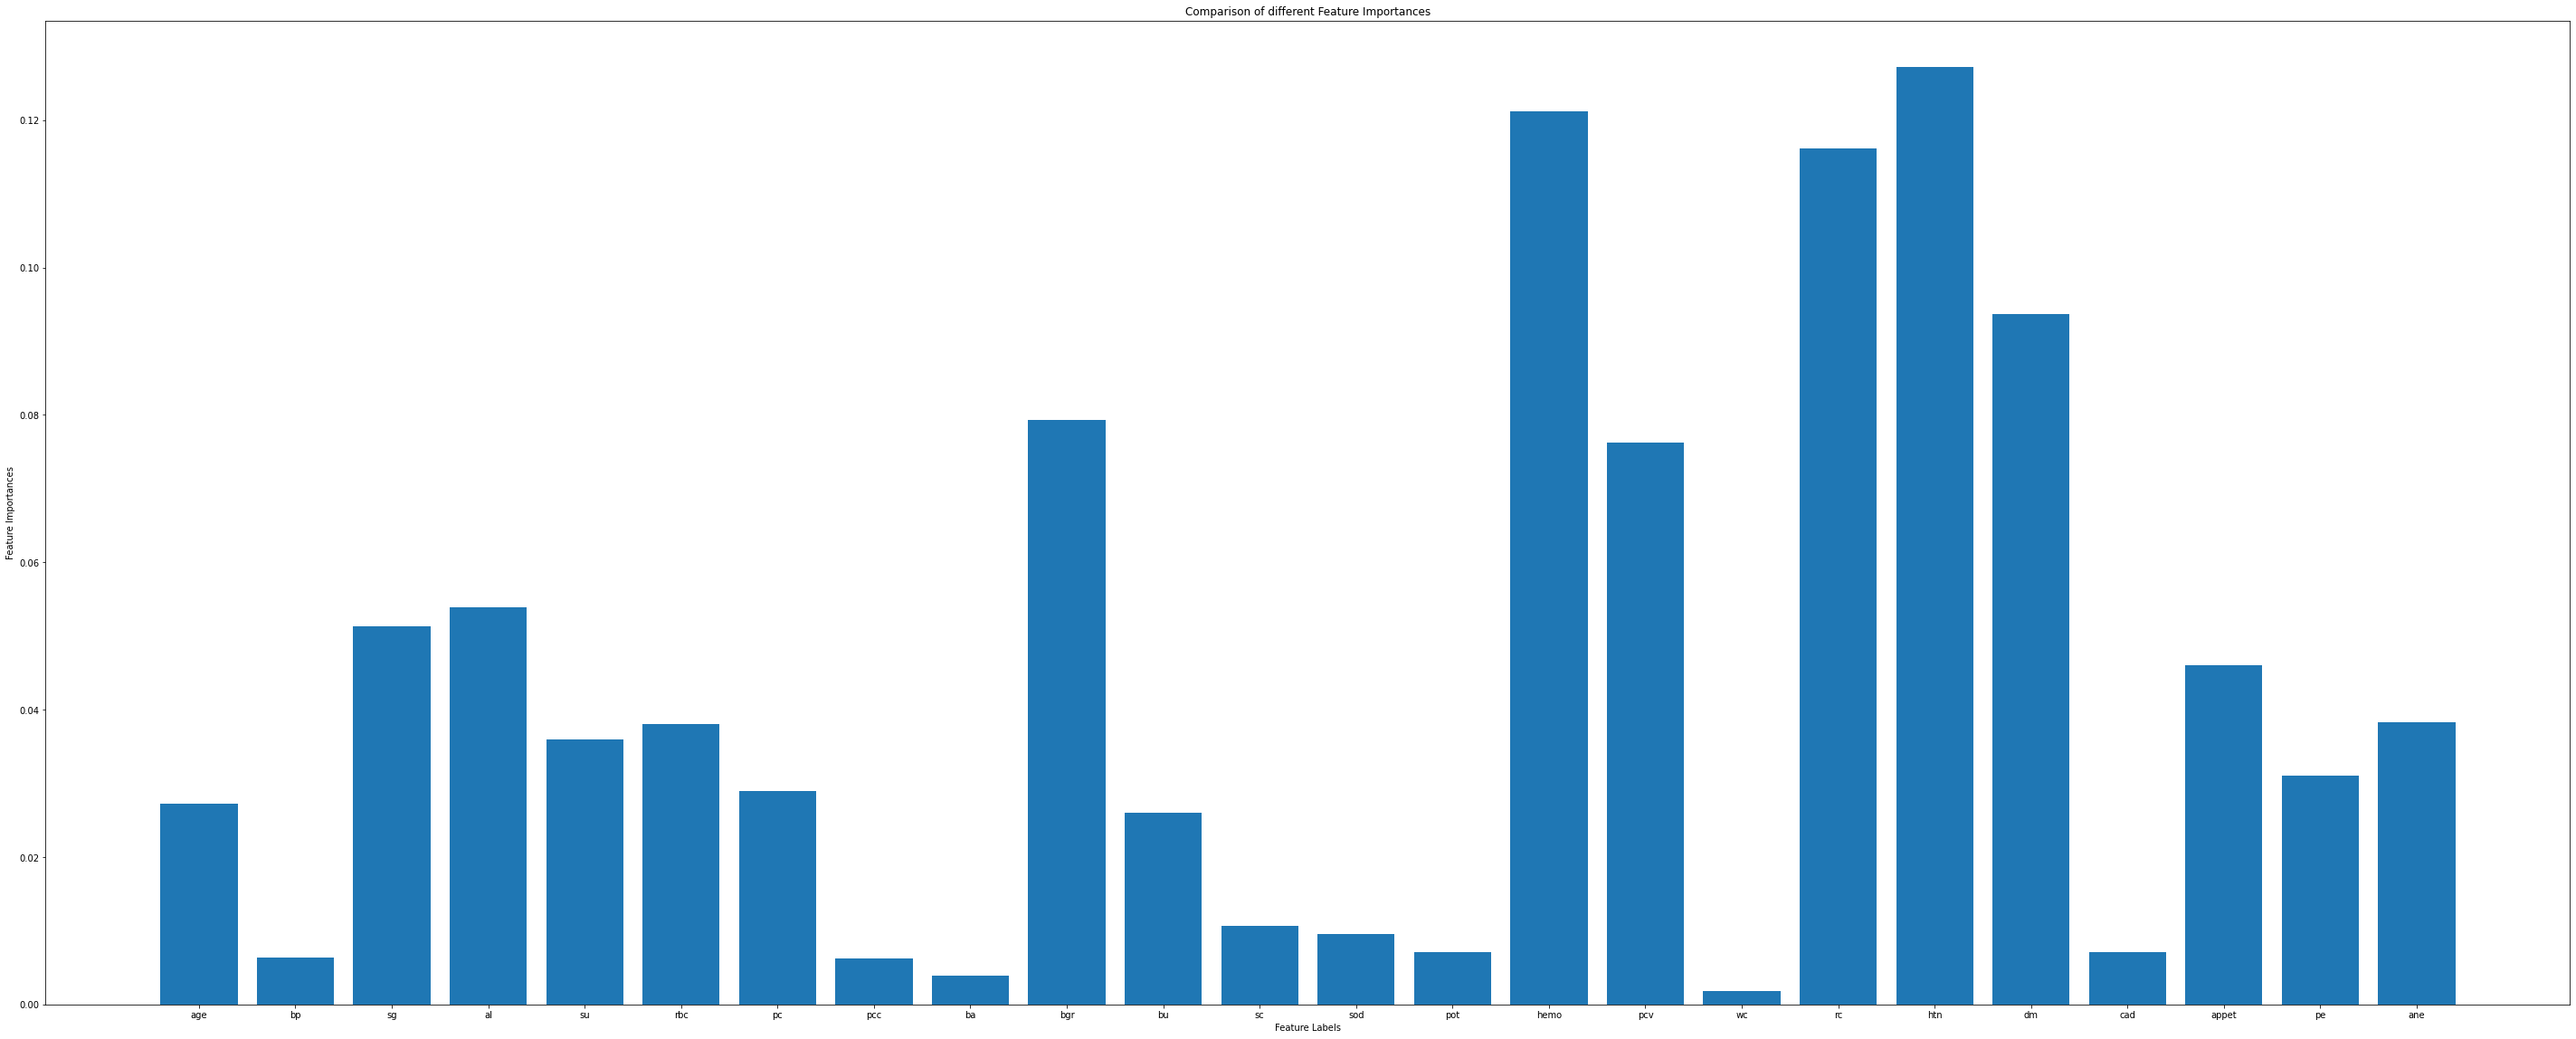

In [41]:
plt.figure(figsize=(50,20))
plt.bar(X.columns, feature_importance_normalized)

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Index(['hemo', 'htn', 'dm', 'rc', 'pcv', 'sg', 'bgr', 'rbc', 'appet', 'al'], dtype='object')


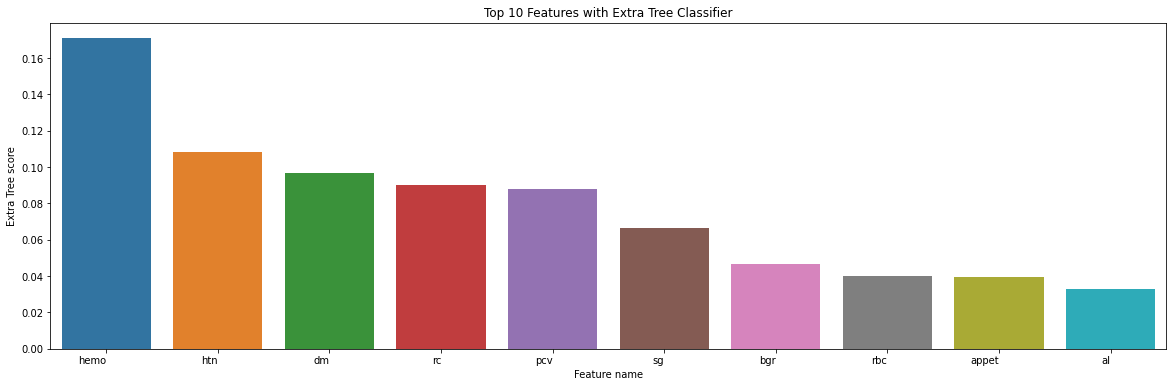

In [42]:
feature_scores=pd.DataFrame(extra_tree_forest.feature_importances_,columns=['Score'],index=X.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])
plt.figure(figsize=(20,6))
print(top10_feature.index)
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Extra Tree Classifier')
p = plt.xlabel('Feature name')
p = plt.ylabel('Extra Tree score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

In [43]:
top10_feature.index

Index(['hemo', 'htn', 'dm', 'rc', 'pcv', 'sg', 'bgr', 'rbc', 'appet', 'al'], dtype='object')

In [44]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [45]:
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [46]:
X.head()


,sg,al,rbc,bgr,hemo,pcv,rc,htn,dm,appet
0,1.020,1.0,0,121.0,15.4,44.0,5.2,1,1,0
1,1.020,4.0,0,121.0,11.3,38.0,4.8,0,0,0
2,1.010,2.0,0,423.0,9.6,31.0,4.8,0,1,1
3,1.005,4.0,0,117.0,11.2,32.0,3.9,1,0,1
4,1.010,2.0,0,106.0,11.6,35.0,4.6,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = None)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
CLASSIFIER: GradientBoostingClassifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier
gb_acc = accuracy_score(y_test, gb.predict(X_test))
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc*100} \n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 100.0 

Confusion Matrix :- 
 [[40  0]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        80

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



CLASSIFIER: STOCHASTIC GRADIENT BOOSTING CLASSIFIER

In [58]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))*100}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 100.0
Test Accuracy of Stochastic Gradient Boosting is 99.16666666666667 

Confusion Matrix :- 
[[39  1]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        80

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



CLASSIFIER: EXTRA TREE CLASSIFIER

In [59]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))*100}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 100.0
Test Accuracy of Extra Trees Classifier is 100.0 

Confusion Matrix :- 
[[40  0]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        80

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



CLASSIFIER: KNN CLASSIFIER

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))*100}")
print(f"Test Accuracy of KNN is {knn_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 95.35714285714286
Test Accuracy of KNN is 95.83333333333334 

Confusion Matrix :- 
[[38  2]
 [ 3 77]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.96      0.97        80

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120



CLASSIFIER: DESICION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 100.0
Test Accuracy of Decision Tree Classifier is 96.66666666666667 

Confusion Matrix :- 
[[39  1]
 [ 3 77]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.99      0.96      0.97        80

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [62]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [63]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 98.92857142857143
Test Accuracy of Decision Tree Classifier is 99.16666666666667 

Confusion Matrix :- 
[[39  1]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        80

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



CLASSIFIER: RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))*100}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 98.92857142857143
Test Accuracy of Random Forest Classifier is 99.16666666666667 

Confusion Matrix :- 
[[39  1]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        80

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



CLASSIFIER: ADABOOST CLASSIFIER

In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))*100}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 99.64285714285714
Test Accuracy of Ada Boost Classifier is 100.0 

Confusion Matrix :- 
[[40  0]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        80

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



CLASSIFIER: XGBOOST CLASSIFIER

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))*100}")
print(f"Test Accuracy of XgBoost is {xgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 99.28571428571429
Test Accuracy of XgBoost is 98.33333333333333 

Confusion Matrix :- 
[[38  2]
 [ 0 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.98      1.00      0.99        80

    accuracy                           0.98       120
   macro avg       0.99      0.97      0.98       120
weighted avg       0.98      0.98      0.98       120



CLASSIFIER: LGBM CLASSIFIER

In [68]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))*100}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc*100} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 100.0
Test Accuracy of LGBM Classifier is 99.16666666666667 

[[39  1]
 [ 0 80]]

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        80

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



COMPARISON OF MODELS 

In [70]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','ADA Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XGBoost', 'Extra Tree Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, etc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,ADA Boost Classifier,1.000000
4,Gradient Boosting Classifier,1.000000
7,Extra Tree Classifier,1.000000
1,Decision Tree Classifier,0.991667
2,Random Forest Classifier,0.991667
5,Stochastic Gradient Boosting,0.991667
6,XGBoost,0.983333
0,KNN,0.958333


In [74]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')
